In [1]:
import os
import json, urllib, requests
import pandas as pd
import datetime
import seaborn as sns
import pylab as plt
import matplotlib.dates as mdates
from pandas.io.json import json_normalize
epoch = datetime.datetime.utcfromtimestamp(0)
def unix_time_millis(dt):
    return int((dt - epoch).total_seconds() * 1000.0)

## Getting all events for a release

In [2]:
def get_events(issue_id, token):
    cutoff_cursor = unix_time_millis(datetime.datetime.now() - datetime.timedelta(days=90))

    all_events = []
    results = True
    url = "https://sentry.io/api/0/issues/%s/events/"%issue_id
    counter = 0
    while True:
        r = requests.get(url, 
                         headers={'Authorization': 'Bearer %s' % token})
        
        try:
            events_json = r.json()
        except:
            print(r)
            raise
        
        for event in events_json:
            for tag in event['tags']:
                if tag['key'] == 'environment' and tag['value'] in 'prod':
                    all_events.append(event)
        cursor = r.headers['Link'].split(',')[1].split(';')[3].split('=')[1].replace('"', '')
        results_str = r.headers['Link'].split(',')[1].split(';')[2].split('=')[1].replace('"', '')
        print(results_str)
        results = results_str.strip() == 'true'
        print(r.headers['Link'])
        new_url = "https://sentry.io/api/0/issues/%s/events/?cursor=%s"%(issue_id, cursor)
        print(cursor)
        if not results:
            break
        url = new_url
        
    for e in all_events:
        e['tags'] = dict([(a['key'], a['value']) for a in e['tags']])
    
    all_events_df =json_normalize(all_events)
    
    all_events_df.dateCreated = pd.to_datetime(all_events_df.dateCreated)
    
    all_events_df['date_minus_time'] = all_events_df["dateCreated"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    all_events_df['date_minus_time'] = all_events_df['date_minus_time'] - pd.to_timedelta(7, unit='d')
    all_events_df.set_index(all_events_df["date_minus_time"], inplace=True)
    
    return all_events_df

In [3]:
all_successful_events_df = get_events("758615130", os.environ['SENTRY_TOKEN'])

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1553289533000:0:1>; rel="previous"; results="false"; cursor="1553289533000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1553235287000:0:0>; rel="next"; results="true"; cursor="1553235287000:0:0"
1553235287000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1553235287000:0:1>; rel="previous"; results="true"; cursor="1553235287000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1553210330000:0:0>; rel="next"; results="true"; cursor="1553210330000:0:0"
1553210330000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1553210330000:0:1>; rel="previous"; results="true"; cursor="1553210330000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1553184749000:0:0>; rel="next"; results="true"; cursor="1553184749000:0:0"
1553184749000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1553184749000:0:1>; rel="previous"; results="true"; cu

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552723485000:0:1>; rel="previous"; results="true"; cursor="1552723485000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1552722296000:0:0>; rel="next"; results="true"; cursor="1552722296000:0:0"
1552722296000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552722296000:0:1>; rel="previous"; results="true"; cursor="1552722296000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1552721279000:0:0>; rel="next"; results="true"; cursor="1552721279000:0:0"
1552721279000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552721279000:0:1>; rel="previous"; results="true"; cursor="1552721279000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1552698002000:0:0>; rel="next"; results="true"; cursor="1552698002000:0:0"
1552698002000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552698002000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552220483000:0:1>; rel="previous"; results="true"; cursor="1552220483000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1552180497000:0:0>; rel="next"; results="true"; cursor="1552180497000:0:0"
1552180497000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552180497000:0:1>; rel="previous"; results="true"; cursor="1552180497000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1552148178000:0:0>; rel="next"; results="true"; cursor="1552148178000:0:0"
1552148178000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552148178000:0:1>; rel="previous"; results="true"; cursor="1552148178000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1552113438000:0:0>; rel="next"; results="true"; cursor="1552113438000:0:0"
1552113438000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1552113438000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1551421519000:0:1>; rel="previous"; results="true"; cursor="1551421519000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1551399822000:0:0>; rel="next"; results="true"; cursor="1551399822000:0:0"
1551399822000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1551399822000:0:1>; rel="previous"; results="true"; cursor="1551399822000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1551379626000:0:0>; rel="next"; results="true"; cursor="1551379626000:0:0"
1551379626000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1551379626000:0:1>; rel="previous"; results="true"; cursor="1551379626000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1551346511000:0:0>; rel="next"; results="true"; cursor="1551346511000:0:0"
1551346511000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1551346511000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550681352000:0:1>; rel="previous"; results="true"; cursor="1550681352000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1550676324000:0:0>; rel="next"; results="true"; cursor="1550676324000:0:0"
1550676324000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550676324000:0:1>; rel="previous"; results="true"; cursor="1550676324000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1550673084000:0:0>; rel="next"; results="true"; cursor="1550673084000:0:0"
1550673084000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550673084000:0:1>; rel="previous"; results="true"; cursor="1550673084000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1550669477000:0:0>; rel="next"; results="true"; cursor="1550669477000:0:0"
1550669477000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550669477000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550140026000:0:1>; rel="previous"; results="true"; cursor="1550140026000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1550109761000:0:0>; rel="next"; results="true"; cursor="1550109761000:0:0"
1550109761000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550109761000:0:1>; rel="previous"; results="true"; cursor="1550109761000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1550094870000:0:0>; rel="next"; results="true"; cursor="1550094870000:0:0"
1550094870000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550094870000:0:1>; rel="previous"; results="true"; cursor="1550094870000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1550063968000:0:0>; rel="next"; results="true"; cursor="1550063968000:0:0"
1550063968000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1550063968000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1549625796000:0:1>; rel="previous"; results="true"; cursor="1549625796000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1549599084000:0:0>; rel="next"; results="true"; cursor="1549599084000:0:0"
1549599084000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1549599084000:0:1>; rel="previous"; results="true"; cursor="1549599084000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1549572258000:0:0>; rel="next"; results="true"; cursor="1549572258000:0:0"
1549572258000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1549572258000:0:1>; rel="previous"; results="true"; cursor="1549572258000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1549520173000:0:0>; rel="next"; results="true"; cursor="1549520173000:0:0"
1549520173000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1549520173000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1548552355000:0:1>; rel="previous"; results="true"; cursor="1548552355000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1548529581000:0:0>; rel="next"; results="true"; cursor="1548529581000:0:0"
1548529581000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1548529581000:0:1>; rel="previous"; results="true"; cursor="1548529581000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1548501360000:0:0>; rel="next"; results="true"; cursor="1548501360000:0:0"
1548501360000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1548501360000:0:1>; rel="previous"; results="true"; cursor="1548501360000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1548472403000:0:0>; rel="next"; results="true"; cursor="1548472403000:0:0"
1548472403000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1548472403000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1547678550000:0:1>; rel="previous"; results="true"; cursor="1547678550000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1547677300000:0:0>; rel="next"; results="true"; cursor="1547677300000:0:0"
1547677300000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1547677300000:0:1>; rel="previous"; results="true"; cursor="1547677300000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1547676716000:0:0>; rel="next"; results="true"; cursor="1547676716000:0:0"
1547676716000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1547676716000:0:1>; rel="previous"; results="true"; cursor="1547676716000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1547676088000:1:0>; rel="next"; results="true"; cursor="1547676088000:1:0"
1547676088000:1:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1547676088000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1546995369000:0:1>; rel="previous"; results="true"; cursor="1546995369000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1546915023000:0:0>; rel="next"; results="true"; cursor="1546915023000:0:0"
1546915023000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1546915023000:0:1>; rel="previous"; results="true"; cursor="1546915023000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1546630565000:0:0>; rel="next"; results="true"; cursor="1546630565000:0:0"
1546630565000:0:0
true
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1546630565000:0:1>; rel="previous"; results="true"; cursor="1546630565000:0:1", <https://sentry.io/api/0/issues/758615130/events/?&cursor=1546154516000:0:0>; rel="next"; results="true"; cursor="1546154516000:0:0"
1546154516000:0:0
false
<https://sentry.io/api/0/issues/758615130/events/?&cursor=1546154516000:0:1>; rel="previous"; results="true"; cu

In [4]:
all_started_events_df = get_events("540334560", os.environ['SENTRY_TOKEN'])

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1553289759000:0:1>; rel="previous"; results="false"; cursor="1553289759000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1553276869000:0:0>; rel="next"; results="true"; cursor="1553276869000:0:0"
1553276869000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1553276869000:0:1>; rel="previous"; results="true"; cursor="1553276869000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1553260452000:0:0>; rel="next"; results="true"; cursor="1553260452000:0:0"
1553260452000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1553260452000:0:1>; rel="previous"; results="true"; cursor="1553260452000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1553248699000:0:0>; rel="next"; results="true"; cursor="1553248699000:0:0"
1553248699000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1553248699000:0:1>; rel="previous"; results="true"; cu

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552922956000:0:1>; rel="previous"; results="true"; cursor="1552922956000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552898196000:4:0>; rel="next"; results="true"; cursor="1552898196000:4:0"
1552898196000:4:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552898196000:0:1>; rel="previous"; results="true"; cursor="1552898196000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552869646000:1:0>; rel="next"; results="true"; cursor="1552869646000:1:0"
1552869646000:1:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552869646000:0:1>; rel="previous"; results="true"; cursor="1552869646000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552855420000:0:0>; rel="next"; results="true"; cursor="1552855420000:0:0"
1552855420000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552855420000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552669487000:0:1>; rel="previous"; results="true"; cursor="1552669487000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552656479000:0:0>; rel="next"; results="true"; cursor="1552656479000:0:0"
1552656479000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552656479000:0:1>; rel="previous"; results="true"; cursor="1552656479000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552643074000:0:0>; rel="next"; results="true"; cursor="1552643074000:0:0"
1552643074000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552643074000:0:1>; rel="previous"; results="true"; cursor="1552643074000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552629579000:0:0>; rel="next"; results="true"; cursor="1552629579000:0:0"
1552629579000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552629579000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552547595000:0:1>; rel="previous"; results="true"; cursor="1552547595000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552542684000:0:0>; rel="next"; results="true"; cursor="1552542684000:0:0"
1552542684000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552542684000:0:1>; rel="previous"; results="true"; cursor="1552542684000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552532037000:0:0>; rel="next"; results="true"; cursor="1552532037000:0:0"
1552532037000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552532037000:0:1>; rel="previous"; results="true"; cursor="1552532037000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552529372000:0:0>; rel="next"; results="true"; cursor="1552529372000:0:0"
1552529372000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552529372000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552058074000:0:1>; rel="previous"; results="true"; cursor="1552058074000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552047589000:0:0>; rel="next"; results="true"; cursor="1552047589000:0:0"
1552047589000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552047589000:0:1>; rel="previous"; results="true"; cursor="1552047589000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552027092000:0:0>; rel="next"; results="true"; cursor="1552027092000:0:0"
1552027092000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552027092000:0:1>; rel="previous"; results="true"; cursor="1552027092000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1552005854000:0:0>; rel="next"; results="true"; cursor="1552005854000:0:0"
1552005854000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1552005854000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551728418000:0:1>; rel="previous"; results="true"; cursor="1551728418000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1551718289000:1:0>; rel="next"; results="true"; cursor="1551718289000:1:0"
1551718289000:1:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551718289000:0:1>; rel="previous"; results="true"; cursor="1551718289000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1551702166000:0:0>; rel="next"; results="true"; cursor="1551702166000:0:0"
1551702166000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551702166000:0:1>; rel="previous"; results="true"; cursor="1551702166000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1551667757000:0:0>; rel="next"; results="true"; cursor="1551667757000:0:0"
1551667757000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551667757000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551198515000:0:1>; rel="previous"; results="true"; cursor="1551198515000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1551176107000:0:0>; rel="next"; results="true"; cursor="1551176107000:0:0"
1551176107000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551176107000:0:1>; rel="previous"; results="true"; cursor="1551176107000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1551159236000:0:0>; rel="next"; results="true"; cursor="1551159236000:0:0"
1551159236000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551159236000:0:1>; rel="previous"; results="true"; cursor="1551159236000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1551141058000:0:0>; rel="next"; results="true"; cursor="1551141058000:0:0"
1551141058000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1551141058000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550796180000:0:1>; rel="previous"; results="true"; cursor="1550796180000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550792867000:0:0>; rel="next"; results="true"; cursor="1550792867000:0:0"
1550792867000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550792867000:0:1>; rel="previous"; results="true"; cursor="1550792867000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550789173000:0:0>; rel="next"; results="true"; cursor="1550789173000:0:0"
1550789173000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550789173000:0:1>; rel="previous"; results="true"; cursor="1550789173000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550786130000:0:0>; rel="next"; results="true"; cursor="1550786130000:0:0"
1550786130000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550786130000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550644479000:0:1>; rel="previous"; results="true"; cursor="1550644479000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550642964000:5:0>; rel="next"; results="true"; cursor="1550642964000:5:0"
1550642964000:5:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550642964000:0:1>; rel="previous"; results="true"; cursor="1550642964000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550639841000:0:0>; rel="next"; results="true"; cursor="1550639841000:0:0"
1550639841000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550639841000:0:1>; rel="previous"; results="true"; cursor="1550639841000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550630345000:0:0>; rel="next"; results="true"; cursor="1550630345000:0:0"
1550630345000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550630345000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550304073000:0:1>; rel="previous"; results="true"; cursor="1550304073000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550275429000:0:0>; rel="next"; results="true"; cursor="1550275429000:0:0"
1550275429000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550275429000:0:1>; rel="previous"; results="true"; cursor="1550275429000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550266943000:0:0>; rel="next"; results="true"; cursor="1550266943000:0:0"
1550266943000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550266943000:0:1>; rel="previous"; results="true"; cursor="1550266943000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1550258583000:0:0>; rel="next"; results="true"; cursor="1550258583000:0:0"
1550258583000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1550258583000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549956846000:0:1>; rel="previous"; results="true"; cursor="1549956846000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549943672000:0:0>; rel="next"; results="true"; cursor="1549943672000:0:0"
1549943672000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549943672000:0:1>; rel="previous"; results="true"; cursor="1549943672000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549930392000:0:0>; rel="next"; results="true"; cursor="1549930392000:0:0"
1549930392000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549930392000:0:1>; rel="previous"; results="true"; cursor="1549930392000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549922678000:0:0>; rel="next"; results="true"; cursor="1549922678000:0:0"
1549922678000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549922678000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549633881000:0:1>; rel="previous"; results="true"; cursor="1549633881000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549625590000:0:0>; rel="next"; results="true"; cursor="1549625590000:0:0"
1549625590000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549625590000:0:1>; rel="previous"; results="true"; cursor="1549625590000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549615334000:0:0>; rel="next"; results="true"; cursor="1549615334000:0:0"
1549615334000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549615334000:0:1>; rel="previous"; results="true"; cursor="1549615334000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549599294000:0:0>; rel="next"; results="true"; cursor="1549599294000:0:0"
1549599294000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549599294000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549358827000:0:1>; rel="previous"; results="true"; cursor="1549358827000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549356568000:0:0>; rel="next"; results="true"; cursor="1549356568000:0:0"
1549356568000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549356568000:0:1>; rel="previous"; results="true"; cursor="1549356568000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549353840000:0:0>; rel="next"; results="true"; cursor="1549353840000:0:0"
1549353840000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549353840000:0:1>; rel="previous"; results="true"; cursor="1549353840000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1549350796000:0:0>; rel="next"; results="true"; cursor="1549350796000:0:0"
1549350796000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1549350796000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548964316000:0:1>; rel="previous"; results="true"; cursor="1548964316000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548962637000:0:0>; rel="next"; results="true"; cursor="1548962637000:0:0"
1548962637000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548962637000:0:1>; rel="previous"; results="true"; cursor="1548962637000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548959358000:0:0>; rel="next"; results="true"; cursor="1548959358000:0:0"
1548959358000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548959358000:0:1>; rel="previous"; results="true"; cursor="1548959358000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548957113000:0:0>; rel="next"; results="true"; cursor="1548957113000:0:0"
1548957113000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548957113000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548728404000:0:1>; rel="previous"; results="true"; cursor="1548728404000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548699609000:0:0>; rel="next"; results="true"; cursor="1548699609000:0:0"
1548699609000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548699609000:0:1>; rel="previous"; results="true"; cursor="1548699609000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548686482000:0:0>; rel="next"; results="true"; cursor="1548686482000:0:0"
1548686482000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548686482000:0:1>; rel="previous"; results="true"; cursor="1548686482000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548663688000:1:0>; rel="next"; results="true"; cursor="1548663688000:1:0"
1548663688000:1:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548663688000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548258284000:0:1>; rel="previous"; results="true"; cursor="1548258284000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548229139000:0:0>; rel="next"; results="true"; cursor="1548229139000:0:0"
1548229139000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548229139000:0:1>; rel="previous"; results="true"; cursor="1548229139000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548193703000:0:0>; rel="next"; results="true"; cursor="1548193703000:0:0"
1548193703000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548193703000:0:1>; rel="previous"; results="true"; cursor="1548193703000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1548179976000:0:0>; rel="next"; results="true"; cursor="1548179976000:0:0"
1548179976000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1548179976000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547779696000:0:1>; rel="previous"; results="true"; cursor="1547779696000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1547779079000:0:0>; rel="next"; results="true"; cursor="1547779079000:0:0"
1547779079000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547779079000:0:1>; rel="previous"; results="true"; cursor="1547779079000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1547778500000:0:0>; rel="next"; results="true"; cursor="1547778500000:0:0"
1547778500000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547778500000:0:1>; rel="previous"; results="true"; cursor="1547778500000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1547774846000:0:0>; rel="next"; results="true"; cursor="1547774846000:0:0"
1547774846000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547774846000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547576592000:0:1>; rel="previous"; results="true"; cursor="1547576592000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1547557473000:0:0>; rel="next"; results="true"; cursor="1547557473000:0:0"
1547557473000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547557473000:0:1>; rel="previous"; results="true"; cursor="1547557473000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1547518206000:0:0>; rel="next"; results="true"; cursor="1547518206000:0:0"
1547518206000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547518206000:0:1>; rel="previous"; results="true"; cursor="1547518206000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1547501440000:0:0>; rel="next"; results="true"; cursor="1547501440000:0:0"
1547501440000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1547501440000:0:1>; rel="previous"; results="true"; cur

true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1546940107000:0:1>; rel="previous"; results="true"; cursor="1546940107000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1546907353000:0:0>; rel="next"; results="true"; cursor="1546907353000:0:0"
1546907353000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1546907353000:0:1>; rel="previous"; results="true"; cursor="1546907353000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1546899029000:0:0>; rel="next"; results="true"; cursor="1546899029000:0:0"
1546899029000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1546899029000:0:1>; rel="previous"; results="true"; cursor="1546899029000:0:1", <https://sentry.io/api/0/issues/540334560/events/?&cursor=1546890424000:0:0>; rel="next"; results="true"; cursor="1546890424000:0:0"
1546890424000:0:0
true
<https://sentry.io/api/0/issues/540334560/events/?&cursor=1546890424000:0:1>; rel="previous"; results="true"; cur

In [5]:
suc_ids = all_successful_events_df['tags.run_uuid'].unique()
all_ids = all_started_events_df['tags.run_uuid'].unique()

all_successful_events_df2 = all_started_events_df[all_started_events_df['tags.run_uuid'].isin(suc_ids)]

## Successful runs per week

C:\Users\me\Miniconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


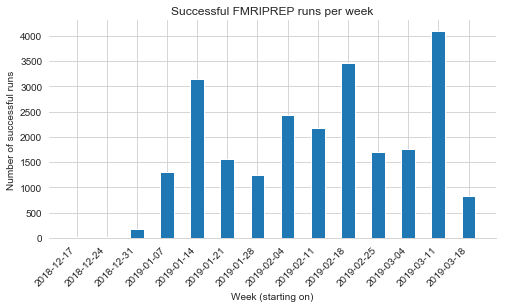

In [6]:
sns.set_style("whitegrid")
grouped_df = all_successful_events_df[['date_minus_time', 'id']].resample('W-Mon', on='date_minus_time')['id'].count()
fig,ax = plt.subplots(figsize=(8,4))
plt.bar(grouped_df.index, grouped_df.values, width=3.2)
plt.ylabel("Number of successful runs")
plt.xlabel("Week (starting on)")
plt.title("Successful FMRIPREP runs per week")
ax.set_xticks(grouped_df.index)
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
#_ = plt.xticks(rotation=45)
sns.despine(left=True)

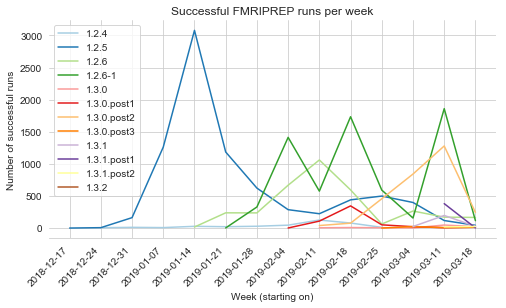

In [7]:
sns.set_style("whitegrid")

versions = sorted(all_successful_events_df['tags.release'].unique())[-12:]

sns.set_palette("Paired", len(versions))
fig,ax = plt.subplots(figsize=(8,4))

for version in versions:
    this_ver_df = all_successful_events_df[all_successful_events_df['tags.release'] == version]
    this_ver_grouped_df = this_ver_df[['date_minus_time', 'id']].resample('W-Mon', on='date_minus_time')['id'].count()
    plt.plot(this_ver_grouped_df.index, this_ver_grouped_df.values, label=version)

plt.ylabel("Number of successful runs")
plt.xlabel("Week (starting on)")
plt.title("Successful FMRIPREP runs per week")
ax.set_xticks(grouped_df.index)
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.despine(left=True)
plt.legend()

## Success rate per week

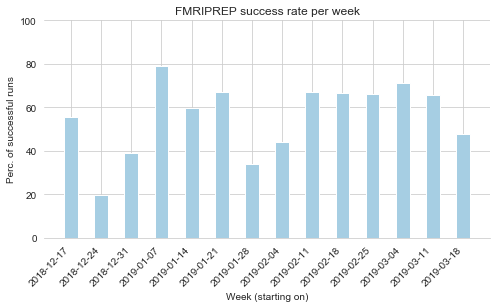

In [8]:
sns.set_style("whitegrid")
grouped_started_df = all_started_events_df[['date_minus_time', 'id']].resample('W-Mon', on='date_minus_time')['id'].count()
grouped_successful_df = all_successful_events_df2[['date_minus_time', 'id']].resample('W-Mon', on='date_minus_time')['id'].count()

grouped_df = grouped_successful_df/grouped_started_df*100

fig,ax = plt.subplots(figsize=(8,4))
plt.bar(grouped_df.index, grouped_df.values, width=3.2)
plt.ylabel("Perc. of successful runs")
plt.xlabel("Week (starting on)")
plt.title("FMRIPREP success rate per week")
plt.ylim([0,100])
ax.set_xticks(grouped_df.index)
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.despine(left=True)

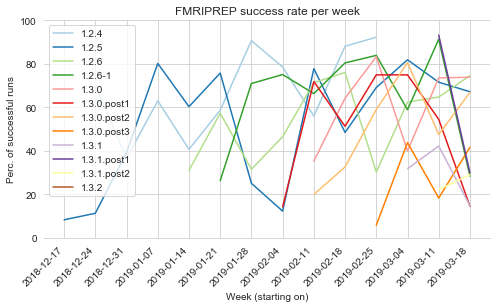

In [9]:
sns.set_style("whitegrid")

sns.set_palette("Paired", len(versions))
fig,ax = plt.subplots(figsize=(8,4))

for version in versions:
    this_ver_suc_df = all_successful_events_df2[all_successful_events_df2['tags.release'] == version]
    this_ver_sta_df = all_started_events_df[all_started_events_df['tags.release'] == version]
    
    grouped_started_df = this_ver_sta_df[['date_minus_time', 'id']].resample('W-Mon', on='date_minus_time')['id'].count()
    grouped_successful_df = this_ver_suc_df[['date_minus_time', 'id']].resample('W-Mon', on='date_minus_time')['id'].count()

    this_ver_grouped_df = grouped_successful_df/grouped_started_df*100
    plt.plot(this_ver_grouped_df.index, this_ver_grouped_df.values, label=version)

plt.ylabel("Perc. of successful runs")
plt.xlabel("Week (starting on)")
plt.title("FMRIPREP success rate per week")
plt.ylim([0,100])
ax.set_xticks(grouped_df.index)
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.despine(left=True)
plt.legend()